<br />
<div align="center">
  <a href="https://www.davivienda.com/wps/portal/personas/nuevo">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" alt="Logo" width="300" height="100">
  </a>

  <h2 align="center"> Prueba Técniva Davivienda - Profesional I Data no Estructurada</h2>
  <h2 align="center"> Notebook de Implementación</h2>
  <h4 align="center"> Luvan Tabares </h4>
    
***

  <p align="center">
    Realizar la oferta correcta en el momento adecuado es una de las principales estrategias de mercadeo que de manera comprobada aumentan la efectividad de las campañas comerciales. Esta estrategia es conocida como Siguiente Mejor Oferta (NBO) y es generalmente responsabilidad de las áreas de analítica de clientes dado que se construye a partir de modelos analíticos predictivos. En este estudio, se construyeron dos modelos de NBO de productos de crédito para clientes del Banco Davivienda. El primer modelo consistió en un Modelo Experto basado en reglas de negocio y asociaciones estadísticas de las variables independientes y la variable objetivo. El segundo modelo consistió en el entrenamiento de una red neuronal multicapa o Fully Connected. El estudio se basó en una base de datos de clientes del Banco Davivienda y sus aperturas de productos de crédito durante un semestre.  </p>
</div>


* [1. EDA - Análisis Exploratorio de Datos](#topic1)
* [2. Extracción de Nombres](#topic2)
* [3. Extracción de Fechas](#topic3)
* [4. Extracción de Montos](#topic4)
* [5. Extracción de Ciudades](#topic5)
* [6. Resultados Finales y Conclusiones](#topic6)



### Instalación de librerias

In [3]:
!pip install pandas==1.2.3
!pip install spacy==3.3.1
!pip install transformers[torch]
!pip install -U scikit-learn
!

/opt/tljh/user/bin/python: No module named spacy


### Importamos las librerias

In [26]:
# Importamos las librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import transformers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
nlp = spacy.load('es_core_news_lg')

## 1. **EDA - Análisis Exploratorio de Datos**

In [5]:
df = pd.read_csv('database/documentos.csv', '|')

In [6]:
df.head()

,document_name,document
0,86,Señor/señora: Daniel Roberto Torres Gómez L...
1,470,Atención: Ana Miguel Jiménez Rodríguez Le e...
2,16,Oiga!!!! Juan Pablo Fernández Muñoz Esperam...
3,165,"Querido/a Carlos Miguel Pérez Pérez, Espera..."
4,114,Estimadisimo/a Daniel Cristina Rodríguez Gon...


In [28]:
df.shape

(499, 2)

In [7]:
df.document.iloc[1] # Exploramos uno de los texto analizar

'  Atención: Ana Miguel Jiménez Rodríguez  Le escribimos para informarle que tiene un saldo a favor nuestro de £ 6,487,447,022.84 en su cuenta con nuestra empresa. Como puede recordar, tomó un préstamo con nosotros para   adquirir un auto de lujo Bentley Aventador en San Andrés. A pesar de múltiples intentos de ponerse en contacto con usted y recordarle su deuda pendiente, no hemos recibido ninguna respuesta   ni pago de su parte. Por lo tanto, solicitamos que devuelva el auto a nosotros o pague la totalidad de su deuda lo antes posible. Si no toma medidas en este asunto,   nos veremos obligados a iniciar acciones legales para recuperar la totalidad de su deuda.     Le instamos a que se ponga en contacto con nosotros lo antes posible para   discutir acuerdos de pago y evitar acciones legales adicionales, su deuda esta desde el 01/22/2016.     Si está experimentando dificultades financieras y no puede pagar la   totalidad de su deuda en este momento, no dude en ponerse en contacto con n

Realizamos limpieza a la base de documentos

In [8]:
df.document = df.document.str.lower()  #### ACA VA LA LIMPIEZA GENERAL

Stopwords ..... BLAH BLAH BLAH

In [16]:
stopwords = nlp.Defaults.stop_words

In [20]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=list(stopwords), ngram_range=(1,3)) # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.document) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names_out() # Veo el vocabulario

In [21]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

(499, 1500)


In [22]:
TF_detallada.head() # Exploramos la matriz término-documento

,01,02,03,04,05,06,07,08,09,10,...,yq,yq ue,yq ue solictó,álvarez,álvarez escribimos,álvarez escribimos informarle,álvaro,ánimos,ánimos encontrar,ánimos encontrar solución
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
frecuencias.head(15)

,Freq
legales,720
monto,630
contacto,618
monto deuda,530
encontrar,498
encontrar solución,498
solución,498
acciones legales,460
acciones,460
ponerse,457


<AxesSubplot: >

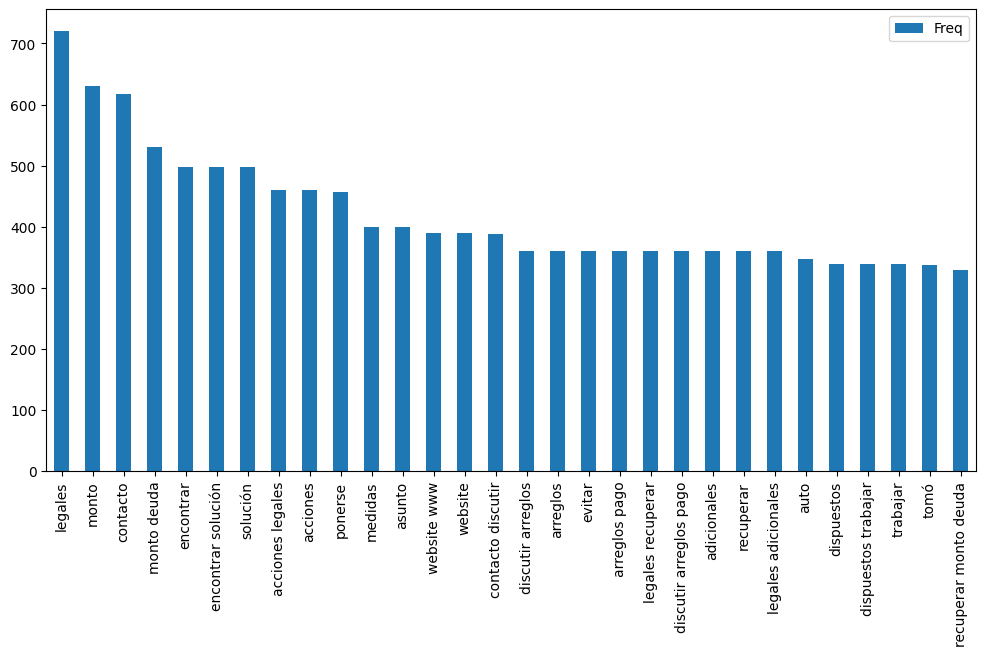

In [27]:
frecuencias.head(30).plot(kind='bar', figsize=(12,6))

## 2. **Extracción de Nombres**

In [ ]:
def remove_url(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.like_url])

def remove_punct(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_punct])

def remove_stop(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

def lemma_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

def extract_date(date_string):
 
  if "-" in date_string:
    
    date = datetime.strptime(date_string, "%Y-%m-%d")
    
  else:
    
    date = datetime.strptime(date_string, "%m/%d/%Y")
  
  
  year = date.year
  month = date.month
  day = date.day

  
  return (year, month, day)

In [ ]:
df["text_nlp"] = df["document"].str.replace(r'\s+', ' ', regex=True)

nlp.Defaults.stop_words.add('hola')
nlp.Defaults.stop_words.add('estimado')
nlp.Defaults.stop_words.add('estimada')
nlp.Defaults.stop_words.add('estimadísimo')
nlp.Defaults.stop_words.add('estimadísima')
nlp.Defaults.stop_words.add('don')
nlp.Defaults.stop_words.add('doña')
nlp.Defaults.stop_words.add('amigo')
nlp.Defaults.stop_words.add('amiga')
nlp.Defaults.stop_words.add('esperamos')
nlp.Defaults.stop_words.add('queridísimo')
nlp.Defaults.stop_words.add('queridísima')


df["text_nlp"] = df["text_nlp"].apply(lemma_text)
df["text_nlp"] = df["text_nlp"].apply(remove_punct)
df["text_nlp"] = df["document"].str.replace('oiga', '')
df["text_nlp"] = df["text_nlp"].apply(remove_stop)

names4 = r'[A-ZÁÉÍÓÚÑa-záéíóúñ]+\s[A-ZÁÉÍÓÚÑa-záéíóúñ]+\s[A-ZÁÉÍÓÚÑa-záéíóúñ]+\s[A-ZÁÉÍÓÚÑa-záéíóúñ]+'
names3 = r'[A-ZÁÉÍÓÚÑa-záéíóúñ]+\s[A-ZÁÉÍÓÚÑa-záéíóúñ]+\s[A-ZÁÉÍÓÚÑa-záéíóúñ]+'


names = []

for x in range(df.shape[0]):
        text = df['text_nlp'][x]
        doc = nlp(text)  
        for ent in doc.ents:          
            if ent.label_ == "PER":
                if re.search(names4, ent.text) or re.search(names3, ent.text):
                    q = ent.text.replace('   carta', '').replace('¡ !', '').replace('   ', '')
                    
                    names.append(q)
                
    

                    break
            else:
                continue
                
df['nombre_cliente'] = names

In [23]:
# class ExtraccionData():
    
#     def __init__(self, path_csv = None):        
#         self.path_csv = path_csv
    
#     def load_dataframe(self):
        
#         import pandas as pd
        
#         df = pd.read_csv(self.path_csv, sep='|')
#         return df
    
#     def extract_size(self, df):        
#         size = df.shape        
#         return size
    
#     def extract_infor_gen(self):
        
#         df = self.load_dataframe()        
#         size = self.extract_size(df)
        
#         return size
        

In [24]:
# extraccion = ExtraccionData(path_csv = 'database/documentos.csv')

In [25]:
# extraccion.extract_infor_gen()

(499, 2)

In [17]:
# calculadora.multiplicacion(2,3)

15

In [ ]:
# df.shape

## 3. **Extracción de Fechas**

In [ ]:
df["text_nlp"] = df["document"].str.replace(r'\s+', ' ', regex=True)

In [ ]:
fechapat = r'([\d]{4}(\-|\/|\_)[\d]{2}(\-|\/|\_)[\d]{2})|([\d]{2}(\-|\/|\_)[\d]{2}(\-|\/|\_)[\d]{4})'
fechs = []


for x in range(df.shape[0]):

    text = df['text_nlp'][x]


    match = re.search(fechapat, text)

    # Extract the number from the match
    
    number = match.group()
    m = number
    (year, month, day) = extract_date(m)
    
    today = datetime(year, month, day) #(YEAR, MONTH, DAY)

    fchas = f'{today:%Y}-{today:%m}-{today:%d}'
    
    fechs.append(fchas)
    
    
df['fecha'] = fechs  

## 4. **Extracción de Montos**

In [ ]:
df["text_nlp"] = df["document"].str.replace(r'\s+', ' ', regex=True)

In [ ]:
numpat = r'[\d]{0,3}(\,|\.)?[\d]{0,3}(\,|\.)?[\d]{0,3}(\,|\.)?[\d]{1,3}(\,|\.)[\d]{1,2}'
money = []

for x in range(df.shape[0]):

    text = df['text_nlp'][x]


    match = re.search(numpat, text)

    # Extract the number from the match
    
    number = match.group()
    m = number.replace(',', '/').replace('.', ',').replace('/', '')
    
    money.append(m)

    

df['monto'] = money

## 5. Extracción de Ciudades

In [87]:
df["text_nlp"] = df["document"].str.replace(r'\s+', ' ', regex=True)

In [88]:
df["text_nlp"] = df["text_nlp"].str.replace('Nos', '')
df["text_nlp"] = df["text_nlp"].str.replace('Initech', '')
df["text_nlp"] = df["text_nlp"].apply(remove_url)


val = []

ciudad1 = r'([A-Z])([a-záéíóúñ]+)'



for x in range(df.shape[0]):
        text = df['text_nlp'][x]
        doc = nlp(text)  
        for ent in doc.ents:          
            if ent.label_ == "LOC":
                
                q = ent.text
                if q == 'Bogotá' or q == 'bogotá':
                    q = 'No encontrado'
                elif re.search(ciudad1, q) is None:
                    q = 'No encontrado'               
                
                val.append(q)
 
                break
            else:
                continue


df['ciudad'] = val

## 6. Resultados Finales y Conclusiones

In [ ]:
df['ciudad'] = df['Document'].apply(extract_dates)
df['ciudad'] = df['Document'].apply(extract_dates)
df['ciudad'] = df['Document'].apply(extract_dates)
df['ciudad'] = df['Document'].apply(extract_dates)

df.to_csv('results.csv', sep = '|')
